# 0. Data Loading

In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel("default of credit card clients.xls",header=1)

In [3]:
data['ID'].duplicated().value_counts()

False    30000
Name: ID, dtype: int64

ID 중복값은 없다, 삭제해도 괜찮음

In [4]:
data = data.drop('ID', axis=1)
data = data.rename(columns={"default payment next month":"default"})
data = data.rename(columns={"PAY_0":"PAY_1"})
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.shape

(30000, 24)

- **Feature Description**
    1. 기본정보
        - LIMIT_BAL(총 신용값?): Amount of given credit in NT dollars (includes individual and family/supplementary credit)
        - SEX: Gender (1=male, 2=female)
        - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) #5,6은 뭐지 **5,6,0 unknown**
        - MARRIAGE: Marital status (1=married, 2=single, 3=others) **3=divorce, 0=unknown**
        - AGE: Age in years
    2. repayment(지불 지연)
        - PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
        - PAY_2: Repayment status in August, 2005 (scale same as above)
        - PAY_3: Repayment status in July, 2005 (scale same as above)
        - PAY_4: Repayment status in June, 2005 (scale same as above)
        - PAY_5: Repayment status in May, 2005 (scale same as above)
        - PAY_6: Repayment status in April, 2005 (scale same as above)
    3. bill(매달 날라오는 신용카드 청구서 금액)
    ***마이너스일땐 overpaid(정해진금액보다 더 낸 경우임. 예를들어, 자동이체를 걸어놨는데 두번 결제한 경우. 또는 환불을 받았을때)*** 신용 등급에 크게 지장을 주지 않는다. 실제로 target변수와의 corr도 낮은 값임.
    https://www.cnbc.com/select/what-does-negative-credit-card-balance-mean/
        - BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
        - BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
        - BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
        - BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
        - BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
        - BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    4. previous payment
    (Prior Payments means a payment of interest component of Loan Repayments made on or prior to the date of any Determination of Taxability, 대출상환의 이자 지불값?), (전달에 지불한 실제 금액)
        - PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
        - PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
        - PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
        - PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
        - PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
        - PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    5. target
        - default: Default payment (1=yes, 0=no) **(종속변수)**

In [6]:
condition = (data['BILL_AMT1']<=0)
data.loc[condition, ['BILL_AMT1']]

,BILL_AMT1
9,0
18,0
19,0
26,-109
38,0
...,...
29962,-264
29973,0
29979,0
29985,0


In [7]:
data['PAY_AMT1']

0            0
1            0
2         1518
3         2000
4         2000
         ...  
29995     8500
29996     1837
29997        0
29998    85900
29999     2078
Name: PAY_AMT1, Length: 30000, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [9]:
data.isna().sum() 

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


- 'BILL' 음수값 : Overpaid!
- 'BILL'과 'PAY_AMT'의 표준편차가 엄청나게 크다

# 1. EDA

## 1-1. 단일변수 파악

### default

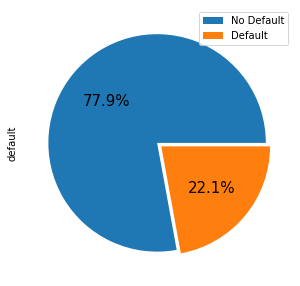

In [11]:
plt.figure(figsize=(7,5))

data['default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Default', 'Default'])
plt.show()

- 약 1:3비율로 target변수 imblance 발생

### sex

In [12]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [13]:
data['default'].groupby(data['SEX']).value_counts(normalize = True)

SEX  default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: default, dtype: float64

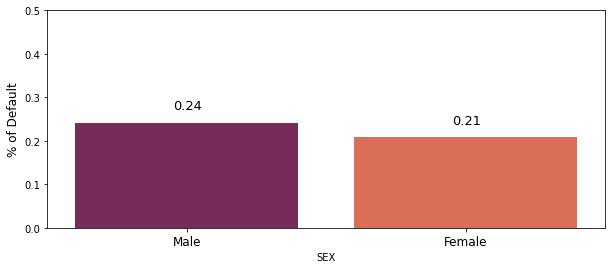

In [14]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "SEX", y = "default", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

- 체납자의 비율은 남성일 경우 살짝 더 높다

### Education

In [15]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
data['default'].groupby(data['EDUCATION']).value_counts(normalize = True)

EDUCATION  default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: default, dtype: float64

- 'EDUCATION' 범주 0 존재
- 5,6,0를 하나의 카테고리(**unknown**)으로 합치기 -> 보통 base category는 숫자 오름차순으로 정해지기 때문에 5가 적절한듯

In [17]:
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(0,5)
data.loc[:,'EDUCATION'] = data.loc[:,'EDUCATION'].replace(6,5)

In [18]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [19]:
data['default'].groupby(data['EDUCATION']).value_counts(normalize = True)

EDUCATION  default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.924638
           1          0.075362
Name: default, dtype: float64

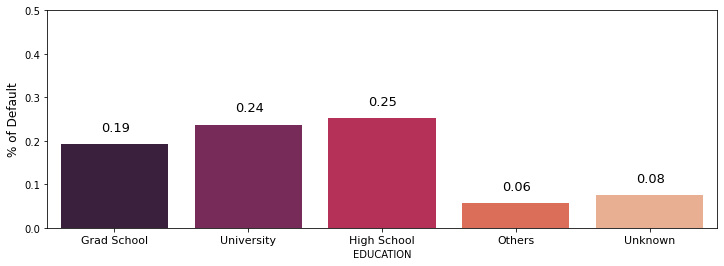

In [20]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "default", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

- other과 unknown이 뭔지는 모르겠으나 확실히 체납자의 비율이 떨어진다

### Marital Status

In [21]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

- 'MARRIAGE' 범주 0 존재
- 1 = married; 2 = single; 3 = divorce; 0=others

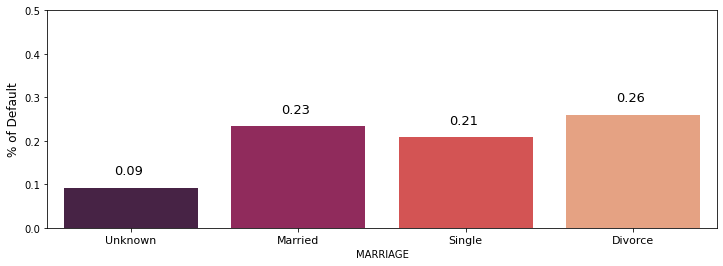

In [22]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = data, palette = 'rocket', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

- unknown을 제외하고는 대부분이 체납자의 비율이 20퍼센트 이상이다

### Age

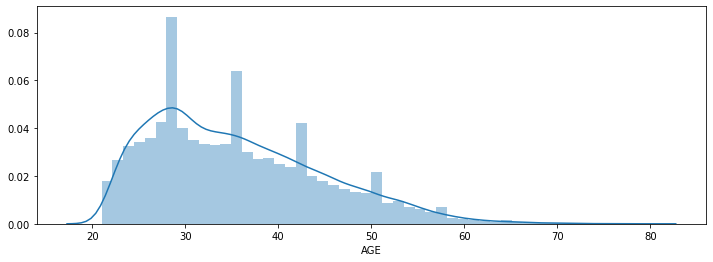

In [23]:
plt.figure(figsize=(12,4))

sns.distplot(data['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

- 분포가 25-35세쯤에 몰려있다

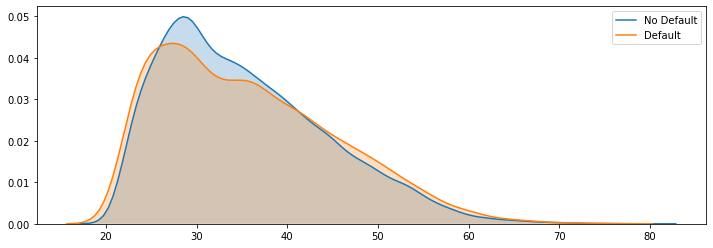

In [24]:
#확률밀도
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(data.loc[(data['default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

- 인구가 쏠린 20대 중반부터 40대 초반까지는 체납자일 확률이 더 적게 나타난다.

In [25]:
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [26]:
data['default'].groupby(data['AgeBin']).value_counts(normalize = True)

AgeBin    default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: default, dtype: float64

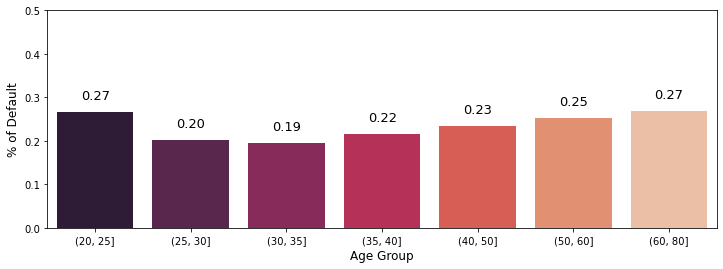

In [27]:
plt.figure(figsize=(12,4))

data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.barplot(x = "AgeBin", y = "default", data = data, palette = 'rocket', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

- 20대 중반부터 30대 중반까지 체납자의 비율이 상대적으로 떨어지는 것을 확인

### LIMIT_BAL

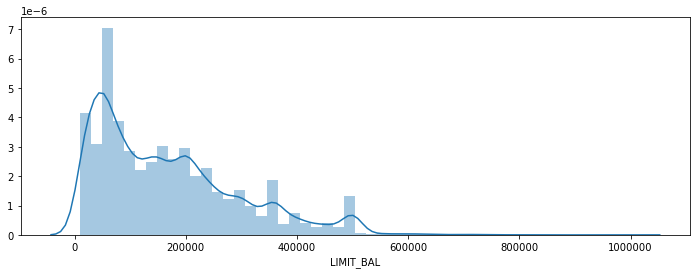

In [28]:
plt.figure(figsize=(12,4))

sns.distplot(data['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

- limit_bal 역시 한쪽으로 치우침

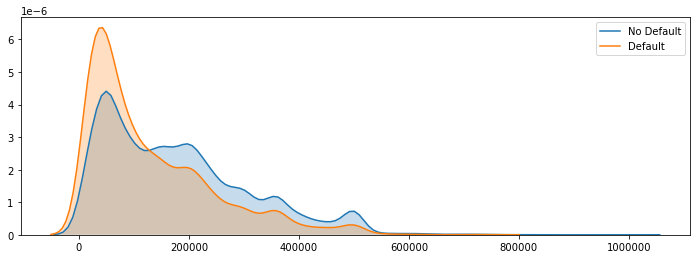

In [29]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(data.loc[(data['default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

- 150,000이하인 경우 체납자일 확률이 더 높다
- 값이 증가할수록 체납자일 확률이 줄어든다

In [30]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['LimitBin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64


In [31]:
data['default'].groupby(data['LimitBin']).value_counts(normalize = True)

LimitBin           default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: default, dtype: float64

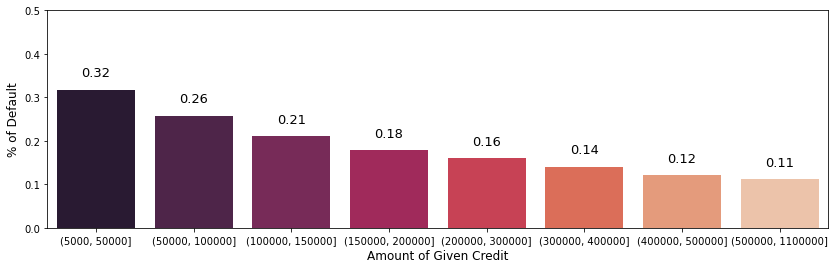

In [32]:
plt.figure(figsize=(14,4))

data['LimitBin'] = data['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(x = "LimitBin", y = "default", data = data, palette = 'rocket', ci = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

- 체납자의 비율이 줄어드는 것을 확인

### PAY_X

In [33]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

- 'PAY' 범주 -2,0 존재
- -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

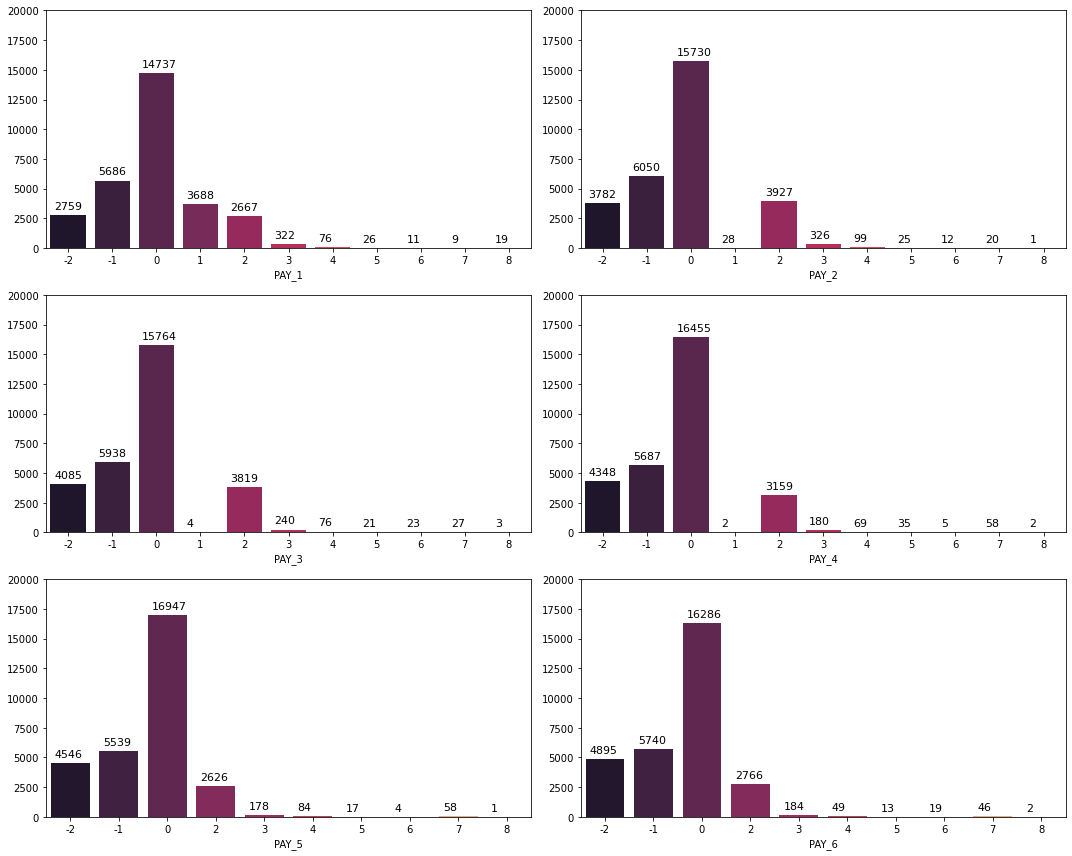

In [34]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data.loc[:,col], palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

- -2,-1,0,1로 범주를 줄여볼까 -> 안됨
- -2,-1,0,1,2,3로? -> 안됨
- -2,-1,0,1,2,3,4로

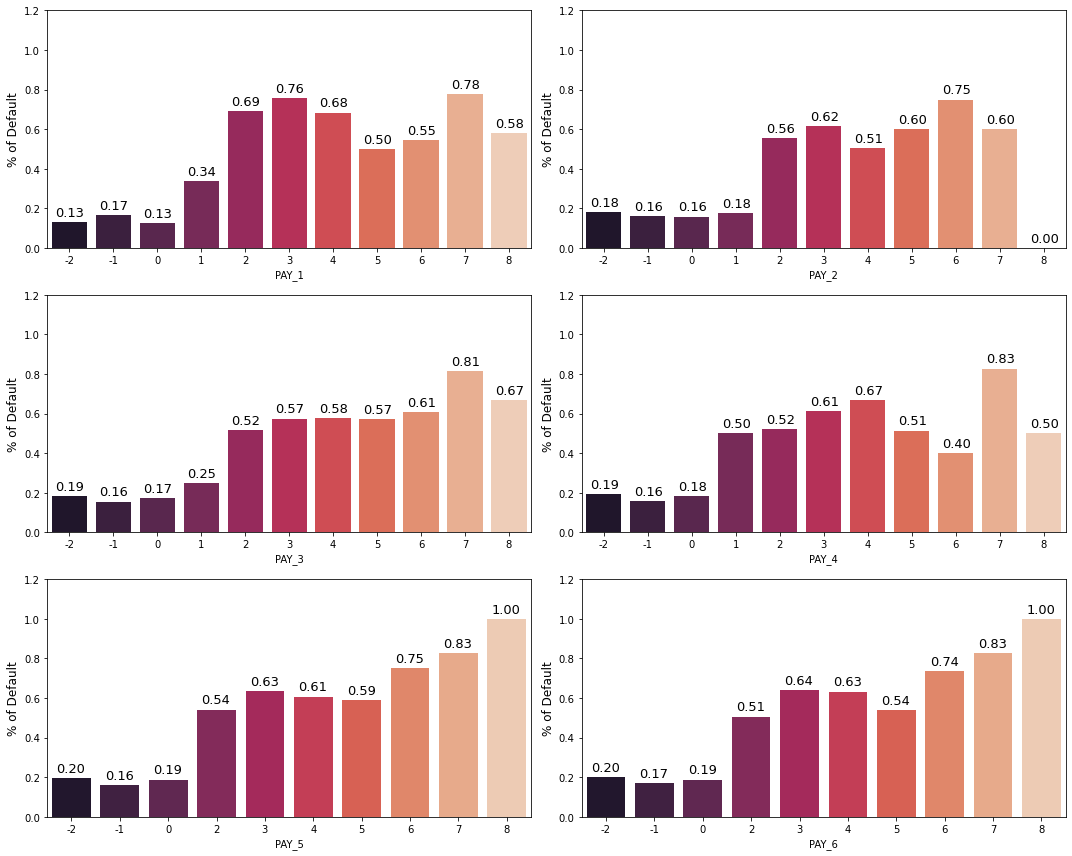

In [35]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

In [36]:
data['PAY_1_new'] = data['PAY_1'].copy()
data['PAY_2_new'] = data['PAY_2'].copy()
data['PAY_3_new'] = data['PAY_3'].copy()
data['PAY_4_new'] = data['PAY_4'].copy()
data['PAY_5_new'] = data['PAY_5'].copy()
data['PAY_6_new'] = data['PAY_6'].copy()

In [37]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:  
    data.loc[:,col] = data.loc[:,col].replace(5,4)
    data.loc[:,col] = data.loc[:,col].replace(6,4)
    data.loc[:,col] = data.loc[:,col].replace(7,4)
    data.loc[:,col] = data.loc[:,col].replace(8,4)

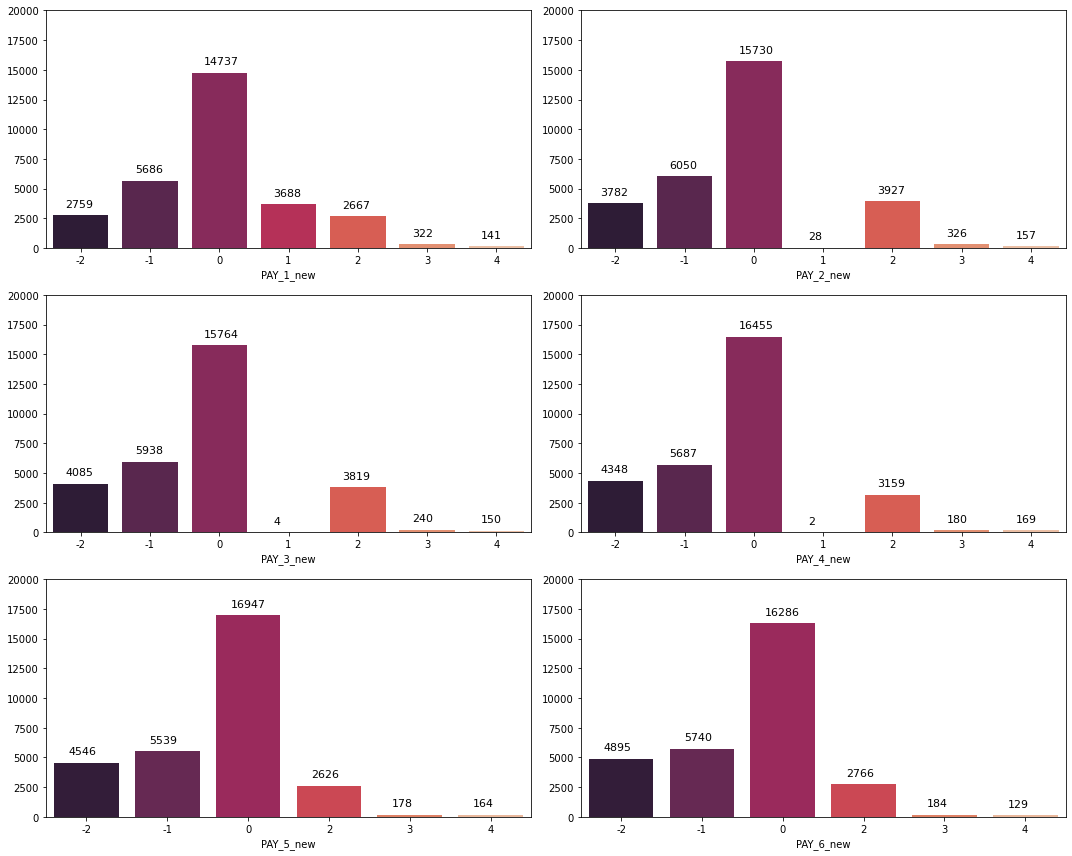

In [38]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, palette = 'rocket')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

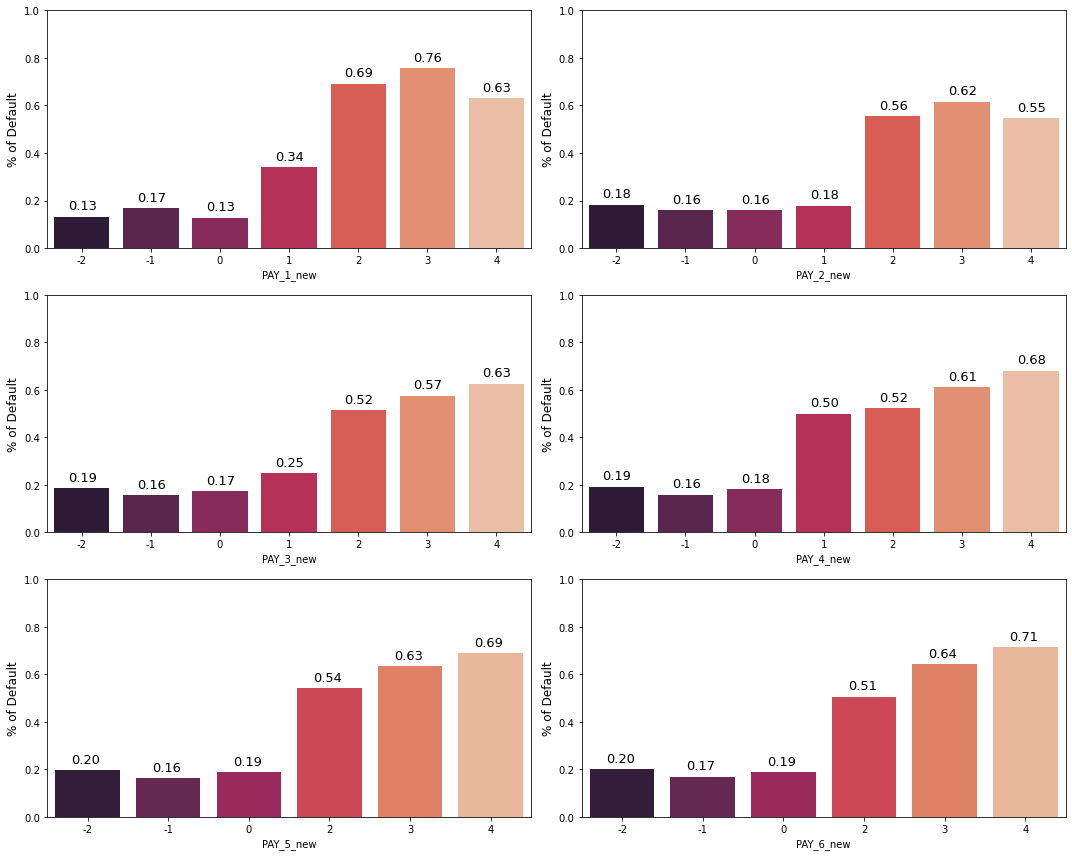

In [39]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_new):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.0)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03),fontsize=13)

plt.show()

### BILL_AMTX

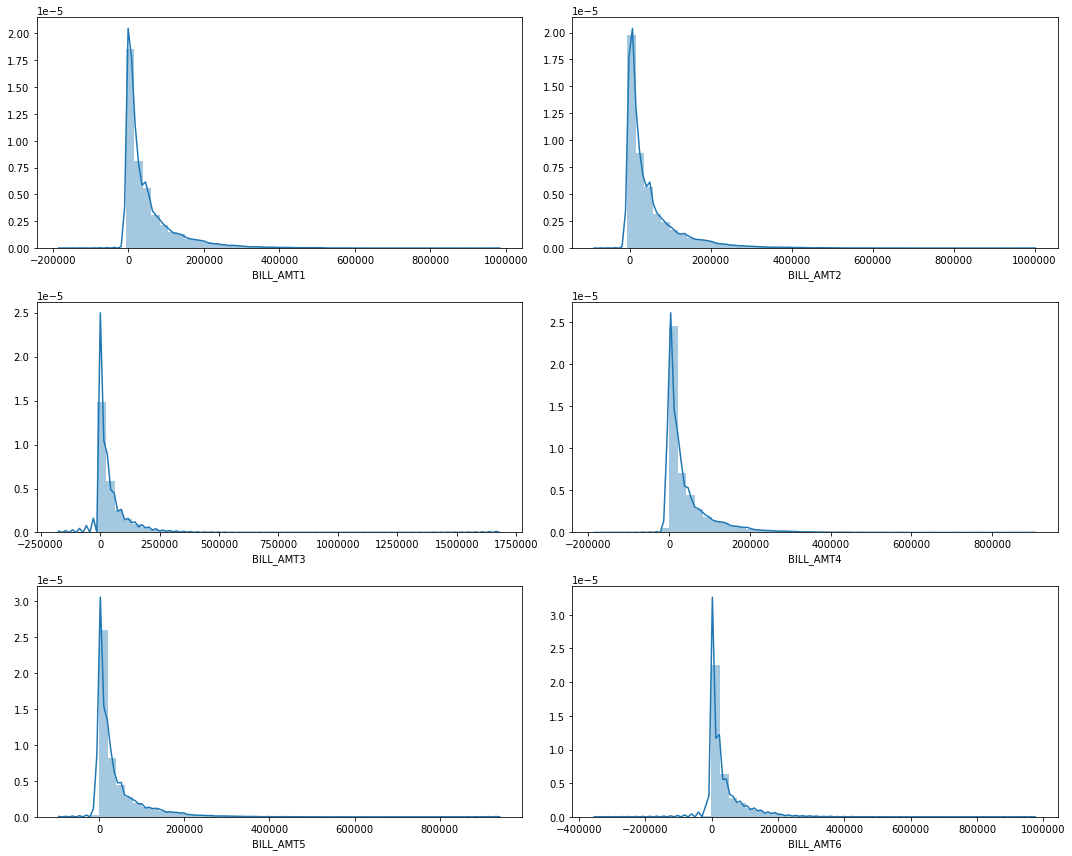

In [40]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

- bill 자체가 한쪽으로 쏠림

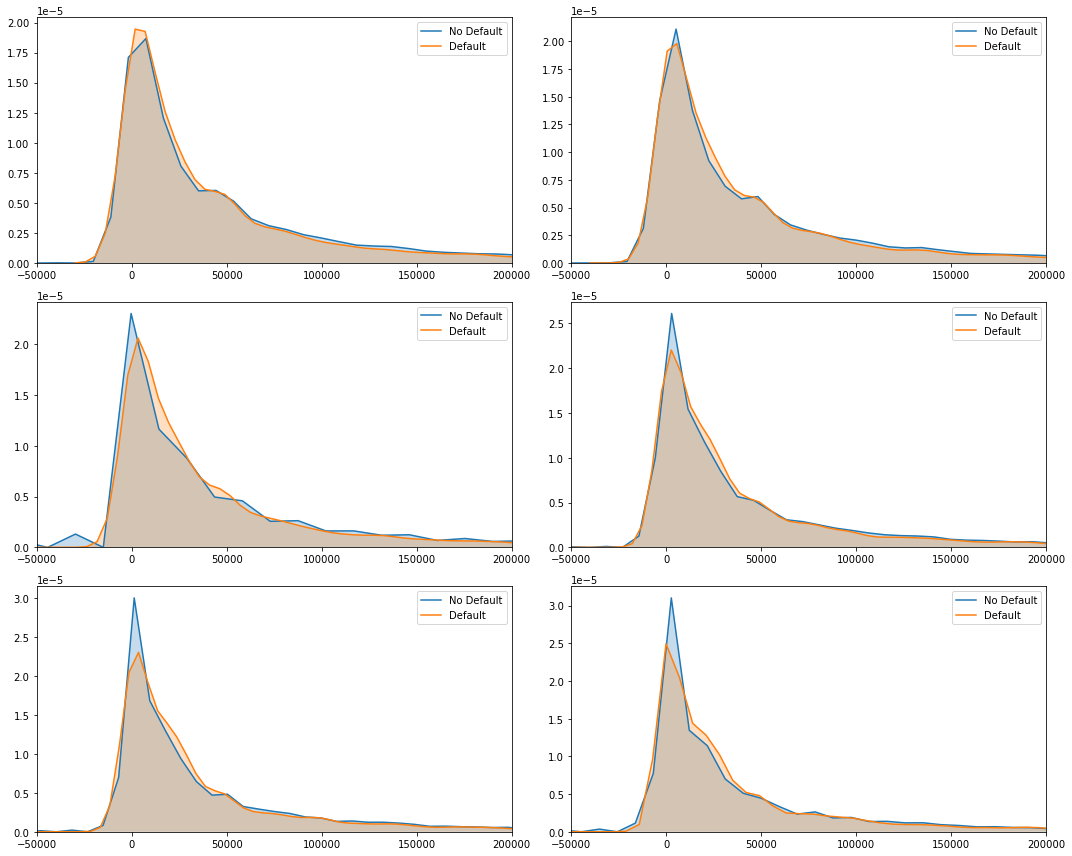

In [41]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

- 0~50,000사이가 체납자의 비율이 떨어짐

In [42]:
data['BILL_AMT1_bin'] = data['BILL_AMT1'].copy()
data['BILL_AMT2_bin'] = data['BILL_AMT2'].copy()
data['BILL_AMT3_bin'] = data['BILL_AMT3'].copy()
data['BILL_AMT4_bin'] = data['BILL_AMT4'].copy()
data['BILL_AMT5_bin'] = data['BILL_AMT5'].copy()
data['BILL_AMT6_bin'] = data['BILL_AMT6'].copy()

In [43]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    data[col] = pd.cut(data[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(data[col].value_counts())

(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: BILL_AMT1_bin, dtype: int64
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: BILL_AMT2_bin, dtype: int64
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: BILL_AMT3_bin, dtype: int64
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: BILL_AMT4_bin, dtype: int64
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: BILL_AMT5_bin, dtype: int64
(0, 25000]          

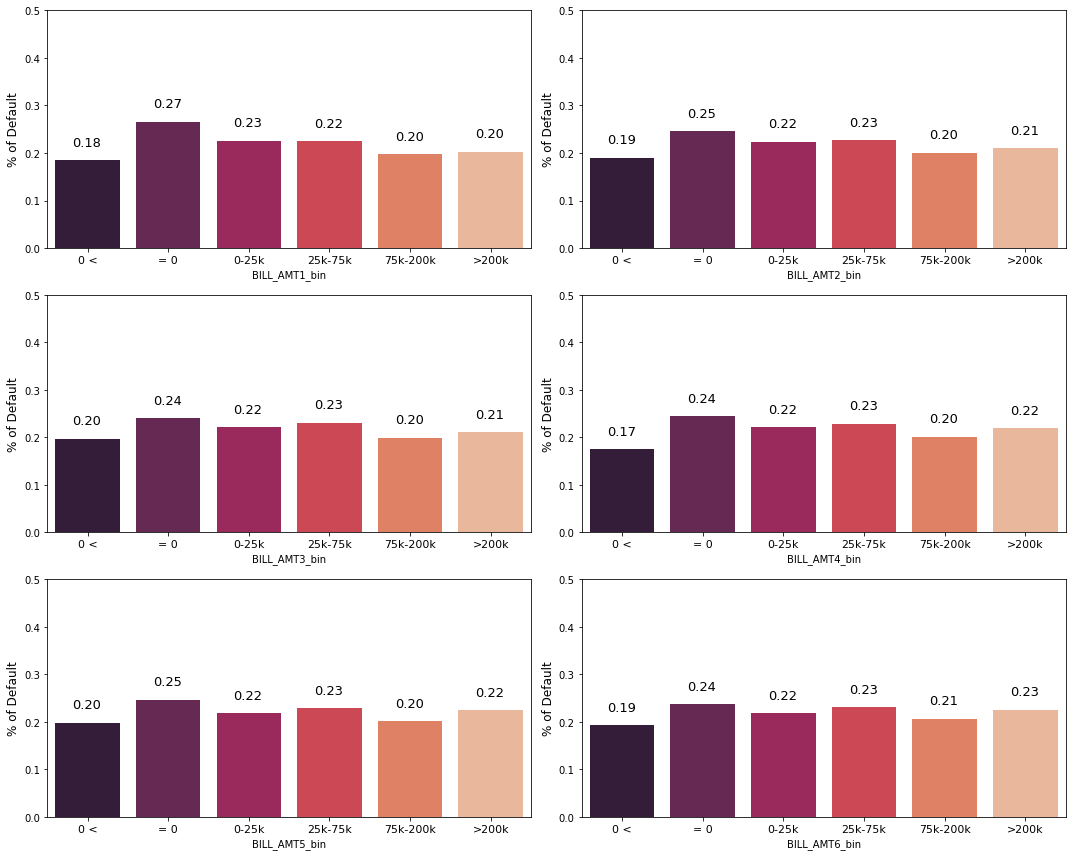

In [44]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

In [45]:
data['BILL_AMT1_new']= max(data['BILL_AMT1']) + abs(data['BILL_AMT1'])
data['BILL_AMT2_new']= max(data['BILL_AMT2']) + abs(data['BILL_AMT2'])
data['BILL_AMT3_new']= max(data['BILL_AMT3']) + abs(data['BILL_AMT3'])
data['BILL_AMT4_new']= max(data['BILL_AMT4']) + abs(data['BILL_AMT4'])
data['BILL_AMT5_new']= max(data['BILL_AMT5']) + abs(data['BILL_AMT5'])
data['BILL_AMT6_new']= max(data['BILL_AMT6']) + abs(data['BILL_AMT6'])

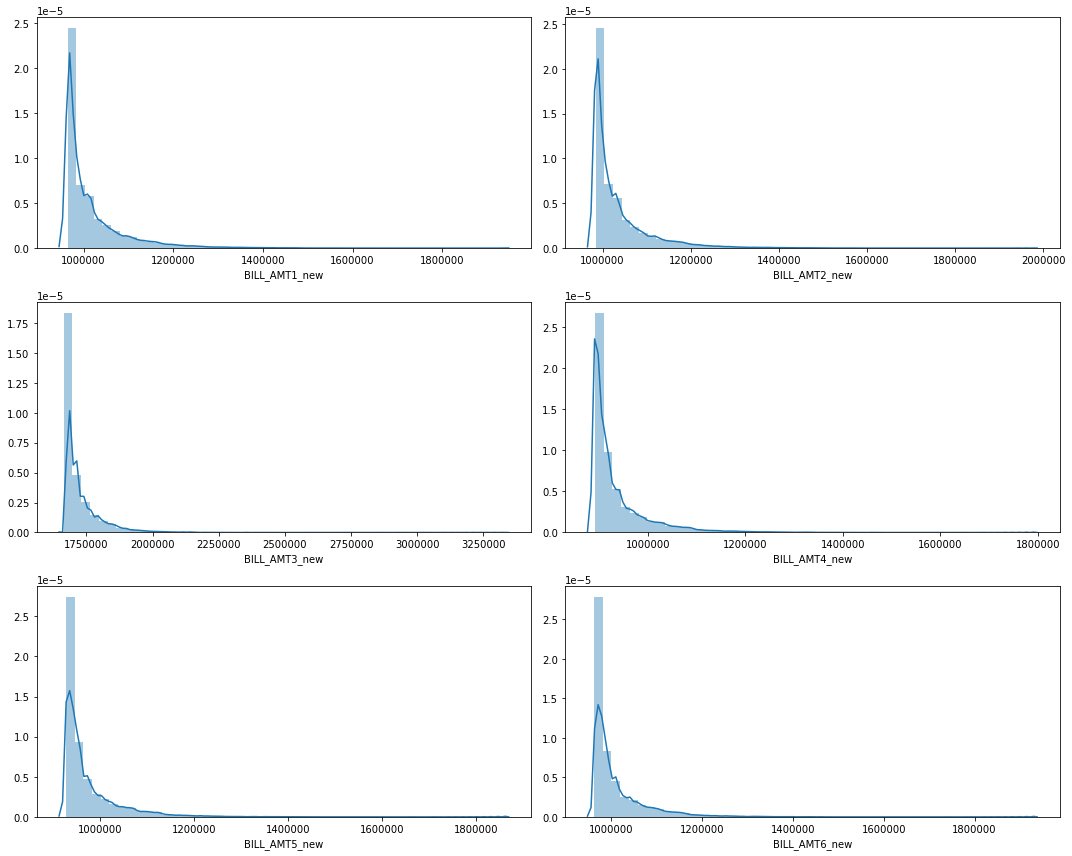

In [46]:
bill_amtx_new_fts = ['BILL_AMT1_new', 'BILL_AMT2_new', 'BILL_AMT3_new', 'BILL_AMT4_new', 'BILL_AMT5_new', 'BILL_AMT6_new']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_new_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

### PAY_AMTX

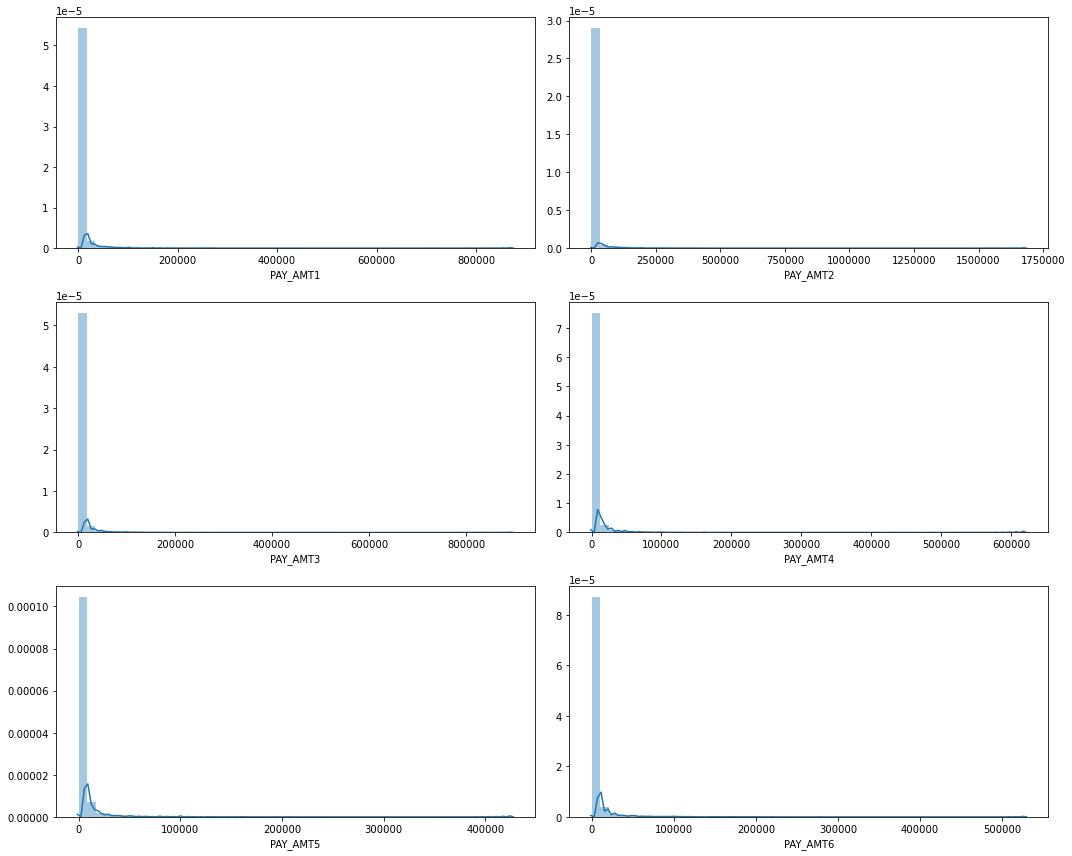

In [47]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

- 0으로 너무 쏠려있음
- 연속형 변수간 정규화가 필요할듯

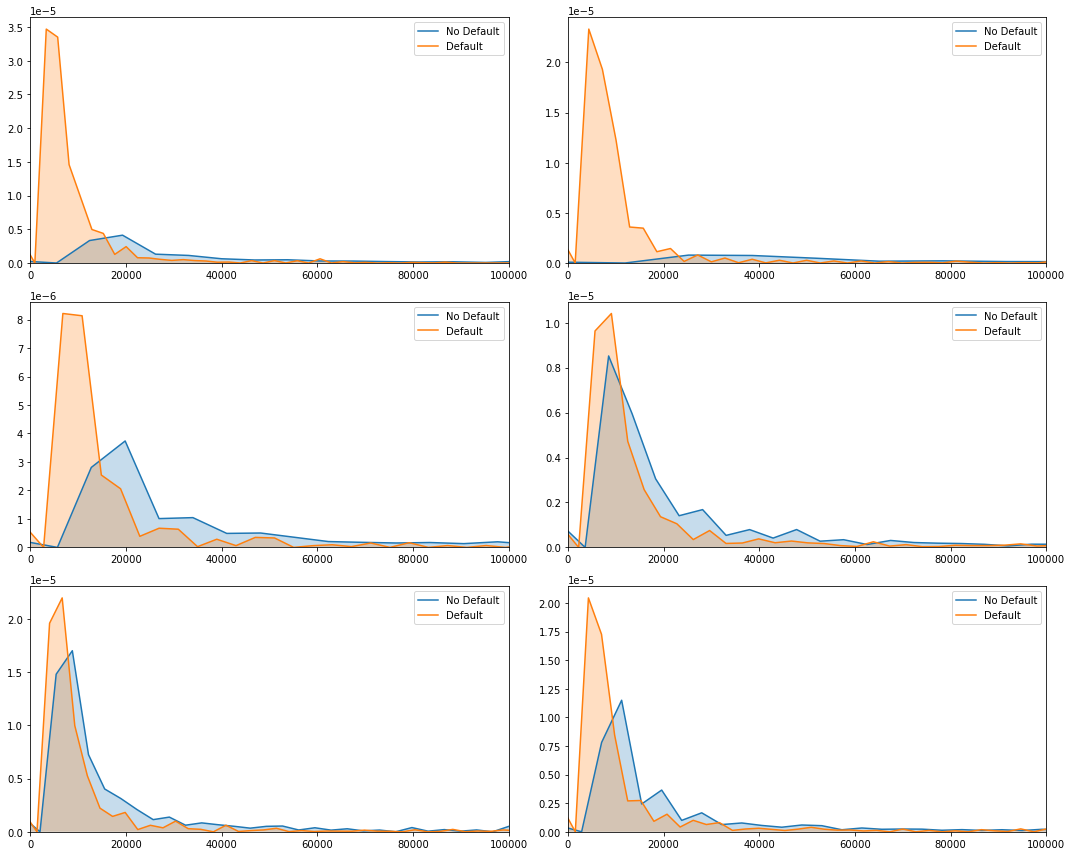

In [48]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

- 0으로 가까울수록 체납자일 확률이 높음

In [49]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [50]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    data[col] = pd.cut(data[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(data[col].value_counts())

(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: PAY_AMT1_bin, dtype: int64
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: PAY_AMT2_bin, dtype: int64
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: PAY_AMT3_bin, dtype: int64
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: PAY_AMT4_bin, dtype: int64
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: PAY_AMT5_bin, dtype: int64
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 2000000]      225
Name: PAY_AMT6_bin, dtype

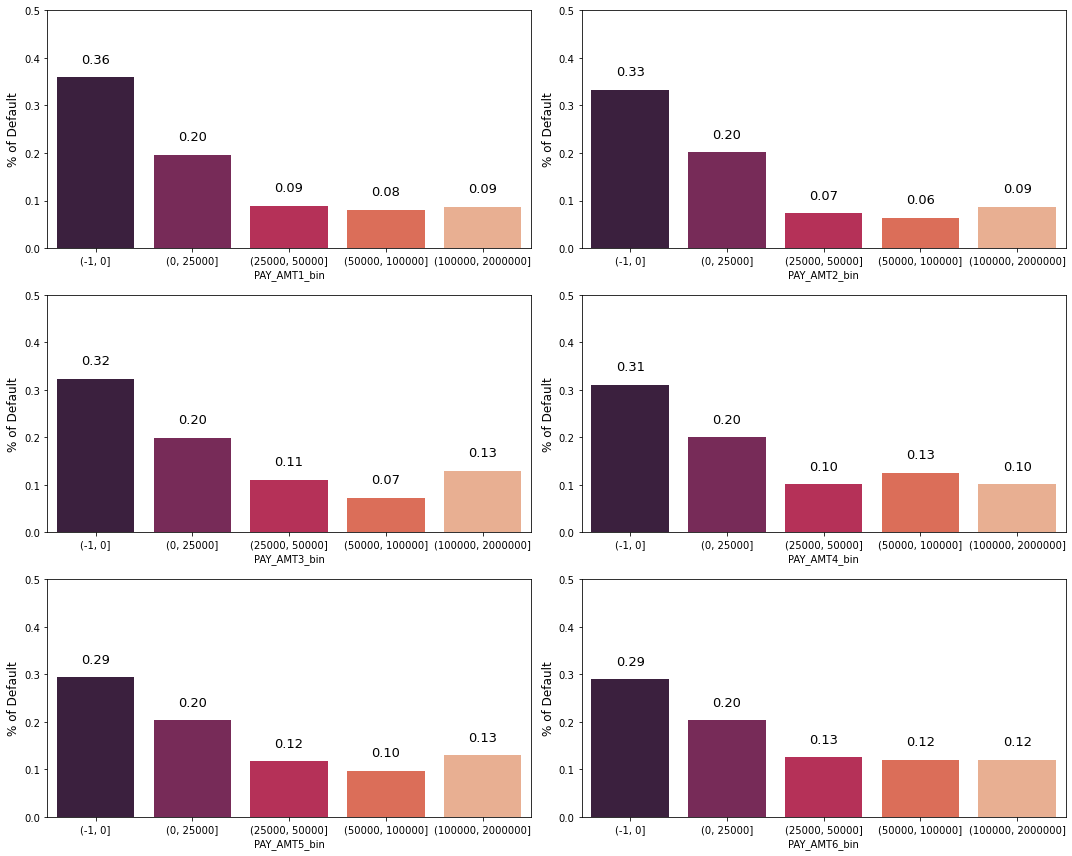

In [51]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      30000 non-null  int64   
 1   SEX            30000 non-null  int64   
 2   EDUCATION      30000 non-null  int64   
 3   MARRIAGE       30000 non-null  int64   
 4   AGE            30000 non-null  int64   
 5   PAY_1          30000 non-null  int64   
 6   PAY_2          30000 non-null  int64   
 7   PAY_3          30000 non-null  int64   
 8   PAY_4          30000 non-null  int64   
 9   PAY_5          30000 non-null  int64   
 10  PAY_6          30000 non-null  int64   
 11  BILL_AMT1      30000 non-null  int64   
 12  BILL_AMT2      30000 non-null  int64   
 13  BILL_AMT3      30000 non-null  int64   
 14  BILL_AMT4      30000 non-null  int64   
 15  BILL_AMT5      30000 non-null  int64   
 16  BILL_AMT6      30000 non-null  int64   
 17  PAY_AMT1       30000 non-null  

# 2. Preprocessing

## data1

- AgeBin : drop
- LIMIT_BAL : drop
- PAY_1~6 : drop
- BILL_AMT1~6_bin : drop
- 우선 PAY_AMT1~6_bin : drop
- BILL_AMT, PAY_AMT: 정규화 작업
- LimitBin : 가변수 작업
- data balancing

In [53]:
data1 = data.copy()

## 2-1. 불필요한 변수 제거

In [54]:
data1 = data1.drop(['AgeBin','LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1_bin','BILL_AMT2_bin','BILL_AMT3_bin','BILL_AMT4_bin','BILL_AMT5_bin','BILL_AMT6_bin','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin'],axis=1)

In [55]:
data1 = data1.drop(['BILL_AMT1_new','BILL_AMT2_new','BILL_AMT3_new','BILL_AMT4_new','BILL_AMT5_new','BILL_AMT6_new'],axis=1)

## 2-2. 연속형 변수 표준화

In [56]:
std_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [57]:
std_list_data=data1[std_list]
no_std_list_data=data1.drop(std_list,axis=1)

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(std_list_data)
scaled_data = std_scaler.transform(std_list_data)

In [59]:
#Dataframe으로 변환
scaled_data=pd.DataFrame(scaled_data,columns=std_list)

In [60]:
data1=pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

## 2-3. 가변수 작업

In [61]:
dummy=pd.get_dummies(data1['LimitBin'], drop_first = True)

In [62]:
data1=data1.drop(['LimitBin'],axis=1)

In [63]:
data1=pd.merge(data1,dummy,left_index=True, right_index=True)

In [64]:
#data1.info()

---

## data2

- AgeBin : drop
- LIMIT_BAL : drop
- PAY_1~6 : drop
- BILL_AMT1~6_bin : drop
- PAY_AMT1~6 : drop
- BILL_AMT : 정규화 작업
- LimitBin, PAY_AMT_bin : 1차 가변수 작업
- PAY_new : 2차 가변수 작업
- data balancing

In [65]:
data2 = data.copy()

## 2-1. 불필요한 변수 제거

In [66]:
data2 = data2.drop(['AgeBin','LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1_bin','BILL_AMT2_bin','BILL_AMT3_bin','BILL_AMT4_bin','BILL_AMT5_bin','BILL_AMT6_bin','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1)

In [67]:
data2 = data2.drop(['BILL_AMT1_new','BILL_AMT2_new','BILL_AMT3_new','BILL_AMT4_new','BILL_AMT5_new','BILL_AMT6_new'],axis=1)

## 2-2. 연속형 변수 표준화

In [68]:
std_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [69]:
std_list_data=data2[std_list]
no_std_list_data=data2.drop(std_list,axis=1)

In [70]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(std_list_data)
scaled_data = std_scaler.transform(std_list_data)

In [71]:
#Dataframe으로 변환
scaled_data=pd.DataFrame(scaled_data,columns=std_list)

In [72]:
data2=pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

In [73]:
#data2.info()

## 2-3. 가변수 작업

In [74]:
dummy=pd.get_dummies(data2[['LimitBin', 'PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin']], drop_first = True)

In [75]:
data2=data2.drop(['LimitBin','PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin'],axis=1)

In [76]:
data2=pd.merge(data2,dummy,left_index=True, right_index=True)

In [77]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEX                             30000 non-null  int64  
 1   EDUCATION                       30000 non-null  int64  
 2   MARRIAGE                        30000 non-null  int64  
 3   AGE                             30000 non-null  int64  
 4   default                         30000 non-null  int64  
 5   BILL_AMT1                       30000 non-null  float64
 6   BILL_AMT2                       30000 non-null  float64
 7   BILL_AMT3                       30000 non-null  float64
 8   BILL_AMT4                       30000 non-null  float64
 9   BILL_AMT5                       30000 non-null  float64
 10  BILL_AMT6                       30000 non-null  float64
 11  PAY_1_new                       30000 non-null  int64  
 12  PAY_2_new                       

In [78]:
pay_new_list = ['PAY_1_new','PAY_2_new','PAY_3_new','PAY_4_new','PAY_5_new','PAY_6_new']

for i in pay_new_list:
    data2[i]=data[i].astype(str)

In [79]:
dummy=pd.get_dummies(data2[['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']], drop_first = True)

In [80]:
data2=data2.drop(['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new'],axis=1)

In [81]:
data2=pd.merge(data2,dummy,left_index=True, right_index=True)

In [82]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEX                             30000 non-null  int64  
 1   EDUCATION                       30000 non-null  int64  
 2   MARRIAGE                        30000 non-null  int64  
 3   AGE                             30000 non-null  int64  
 4   default                         30000 non-null  int64  
 5   BILL_AMT1                       30000 non-null  float64
 6   BILL_AMT2                       30000 non-null  float64
 7   BILL_AMT3                       30000 non-null  float64
 8   BILL_AMT4                       30000 non-null  float64
 9   BILL_AMT5                       30000 non-null  float64
 10  BILL_AMT6                       30000 non-null  float64
 11  LimitBin_(150000, 200000]       30000 non-null  uint8  
 12  LimitBin_(200000, 300000]       

---

## data3

- AgeBin : drop
- LIMIT_BAL : drop
- PAY_1~6 : drop
- BILL_AMT1~6_bin : drop
- 우선 PAY_AMT1~6_bin : drop
- BILL_AMT, PAY_AMT : 정규화 작업
- LimitBin, PAY_new : 가변수 작업
- data balancing

In [83]:
data3 = data.copy()

## 2-1. 불필요한 변수 제거

In [84]:
data3 = data3.drop(['AgeBin','LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1_bin','BILL_AMT2_bin','BILL_AMT3_bin','BILL_AMT4_bin','BILL_AMT5_bin','BILL_AMT6_bin','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin'],axis=1)

In [85]:
data3 = data3.drop(['BILL_AMT1_new','BILL_AMT2_new','BILL_AMT3_new','BILL_AMT4_new','BILL_AMT5_new','BILL_AMT6_new'],axis=1)

## 2-2. 연속형 변수 표준화

In [86]:
std_list=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [87]:
std_list_data=data3[std_list]
no_std_list_data=data3.drop(std_list,axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(std_list_data)
scaled_data = std_scaler.transform(std_list_data)

In [89]:
#Dataframe으로 변환
scaled_data=pd.DataFrame(scaled_data,columns=std_list)

In [90]:
data1=pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

## 2-3. 가변수 작업

In [91]:
dummy=pd.get_dummies(data3['LimitBin'], drop_first = True)

In [92]:
data3=data3.drop(['LimitBin'],axis=1)

In [93]:
data3=pd.merge(data3,dummy,left_index=True, right_index=True)

In [94]:
#data3.info()

In [95]:
pay_new_list = ['PAY_1_new','PAY_2_new','PAY_3_new','PAY_4_new','PAY_5_new','PAY_6_new']

for i in pay_new_list:
    data3[i]=data3[i].astype(str)

In [96]:
dummy=pd.get_dummies(data3[['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']], drop_first = True)

In [97]:
data3=data3.drop(['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new'],axis=1)

In [98]:
data3=pd.merge(data3,dummy,left_index=True, right_index=True)

In [99]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SEX                30000 non-null  int64
 1   EDUCATION          30000 non-null  int64
 2   MARRIAGE           30000 non-null  int64
 3   AGE                30000 non-null  int64
 4   BILL_AMT1          30000 non-null  int64
 5   BILL_AMT2          30000 non-null  int64
 6   BILL_AMT3          30000 non-null  int64
 7   BILL_AMT4          30000 non-null  int64
 8   BILL_AMT5          30000 non-null  int64
 9   BILL_AMT6          30000 non-null  int64
 10  PAY_AMT1           30000 non-null  int64
 11  PAY_AMT2           30000 non-null  int64
 12  PAY_AMT3           30000 non-null  int64
 13  PAY_AMT4           30000 non-null  int64
 14  PAY_AMT5           30000 non-null  int64
 15  PAY_AMT6           30000 non-null  int64
 16  default            30000 non-null  int64
 17  (150000, 200

## data4

- AgeBin : drop
- LIMIT_BAL : drop
- PAY_1~6 : drop
- BILL_AMT1~6_bin, BILL_AMT1~6 : drop
- PAY_AMT1~6 : drop
- BILL_AMT_new : 정규화 작업
- LimitBin, PAY_AMT_bin : 1차 가변수 작업
- PAY_new : 2차 가변수 작업
- data balancing

In [100]:
data4 = data.copy()

## 2-1. 불필요한 변수 제거

In [101]:
data4 = data4.drop(['AgeBin','LIMIT_BAL','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1_bin','BILL_AMT2_bin','BILL_AMT3_bin','BILL_AMT4_bin','BILL_AMT5_bin','BILL_AMT6_bin','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

## 2-2. 연속형 변수 표준화

In [102]:
std_list=['BILL_AMT1_new','BILL_AMT2_new','BILL_AMT3_new','BILL_AMT4_new','BILL_AMT5_new','BILL_AMT6_new']

In [103]:
std_list_data=data4[std_list]
no_std_list_data=data4.drop(std_list,axis=1)

In [104]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(std_list_data)
scaled_data = std_scaler.transform(std_list_data)

In [105]:
#Dataframe으로 변환
scaled_data=pd.DataFrame(scaled_data,columns=std_list)

In [106]:
data4=pd.merge(no_std_list_data,scaled_data,left_index=True, right_index=True)

In [107]:
#data2.info()

## 2-3. 가변수 작업

In [108]:
dummy=pd.get_dummies(data4[['LimitBin', 'PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin']], drop_first = True)

In [109]:
data4=data4.drop(['LimitBin','PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new','PAY_AMT1_bin','PAY_AMT2_bin','PAY_AMT3_bin','PAY_AMT4_bin','PAY_AMT5_bin','PAY_AMT6_bin'],axis=1)

In [110]:
data4=pd.merge(data4,dummy,left_index=True, right_index=True)

In [111]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEX                             30000 non-null  int64  
 1   EDUCATION                       30000 non-null  int64  
 2   MARRIAGE                        30000 non-null  int64  
 3   AGE                             30000 non-null  int64  
 4   default                         30000 non-null  int64  
 5   BILL_AMT1_new                   30000 non-null  float64
 6   BILL_AMT2_new                   30000 non-null  float64
 7   BILL_AMT3_new                   30000 non-null  float64
 8   BILL_AMT4_new                   30000 non-null  float64
 9   BILL_AMT5_new                   30000 non-null  float64
 10  BILL_AMT6_new                   30000 non-null  float64
 11  PAY_1_new                       30000 non-null  int64  
 12  PAY_2_new                       

In [112]:
pay_new_list = ['PAY_1_new','PAY_2_new','PAY_3_new','PAY_4_new','PAY_5_new','PAY_6_new']

for i in pay_new_list:
    data4[i]=data[i].astype(str)

In [113]:
dummy=pd.get_dummies(data4[['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']], drop_first = True)

In [114]:
data4=data4.drop(['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new'],axis=1)

In [115]:
data4=pd.merge(data4,dummy,left_index=True, right_index=True)

In [116]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEX                             30000 non-null  int64  
 1   EDUCATION                       30000 non-null  int64  
 2   MARRIAGE                        30000 non-null  int64  
 3   AGE                             30000 non-null  int64  
 4   default                         30000 non-null  int64  
 5   BILL_AMT1_new                   30000 non-null  float64
 6   BILL_AMT2_new                   30000 non-null  float64
 7   BILL_AMT3_new                   30000 non-null  float64
 8   BILL_AMT4_new                   30000 non-null  float64
 9   BILL_AMT5_new                   30000 non-null  float64
 10  BILL_AMT6_new                   30000 non-null  float64
 11  LimitBin_(150000, 200000]       30000 non-null  uint8  
 12  LimitBin_(200000, 300000]       

# 3. Modeling

## 3-1. Logistic Regression

## data4

In [121]:
from sklearn.model_selection import train_test_split

X = data4.copy().drop('default', axis = 1)
y = data4['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=777)

print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (30000, 75) (30000,) 
Training set  --->  (24000, 75) (24000,) 
Testing set   --->  (6000, 75)  (6000,)


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr4 = LogisticRegression()
lr4.fit(X_train, y_train)
y_pred = lr4.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.83
precision: 0.69
recall: 0.36
F1: 0.48
AUC Score: 0.6600130397216079


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Data Balancing

In [123]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE

## data4

In [126]:
# imbalanced-learn 패키지
from imblearn.over_sampling import RandomOverSampler

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
randomoversampler = RandomOverSampler(random_state=11)
X_train_over, y_train_over = randomoversampler.fit_resample(X_train, y_train)

In [127]:
X_train_over.shape, y_train_over.shape

((37296, 75), (37296,))

In [128]:
lr2 = LogisticRegression()
lr2.fit(X_train_over, y_train_over)
y_pred = lr2.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,y_pred))

accuracy: 0.77
precision: 0.48
recall: 0.62
F1: 0.54
AUC Score: 0.7185084778007657


C:\Users\kmr14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3-2. SVM

In [169]:
#data4_smote
from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train_over, y_train_over)
y_pred = svm.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score 확인
print(roc_auc_score(y_test,y_pred))

accuracy: 0.76
precision: 0.46
recall: 0.60
F1: 0.52
0.7015578305708148


In [176]:
#data4_randomoversampler
from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train_over, y_train_over)
y_pred = svm.predict(X_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

# AUC Score 확인
print(roc_auc_score(y_test,y_pred))

accuracy: 0.80
precision: 0.53
recall: 0.56
F1: 0.55
0.7142874129033793


# NOTE

- data4를 사용했을때가 평균적으로 auc가 가장 높았으며, **최고 0.71(svm)**까지 상승하였다.
- oversampling은 RandomOverSampling을 사용하는게 가장 좋은 성능을 띄고 있음
- ~pay_new변수를 가변수로 사용하면 auc 떨어지는 경향을 발견하였음 (이건 이유를 모르겠음)~
- **Feature Description in data4**
    1. 기본정보
        - ***LIMIT_BAL_bin***
        - SEX: Gender (1=male, 2=female)
        - EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) #5,6은 뭐지 **5,6,0 unknown**
        - MARRIAGE: Marital status (1=married, 2=single, 3=others) **3=divorce, 0=unknown**
        - AGE: Age in years
    2. repayment(지불 지연)
        - ***PAY_1_new***: Repayment status in September, 2005
        - ***PAY_2_new***: Repayment status in August, 2005 
        - ***PAY_3_new***: Repayment status in July, 2005 
        - ***PAY_4_new***: Repayment status in June, 2005 
        - ***PAY_5_new***: Repayment status in May, 2005 
        - ***PAY_6_new***: Repayment status in April, 2005 
    3. bill(매달 날라오는 신용카드 청구서 금액)
        - ***BILL_AMT1_new***
        - ***BILL_AMT2_new*** 
        - ***BILL_AMT3_new*** 
        - ***BILL_AMT4_new*** 
        - ***BILL_AMT5_new***
        - ***BILL_AMT6_new***
    4. previous payment
        - ***PAY_AMT1_bin***
        - ***PAY_AMT2_bin***
        - ***PAY_AMT3_bin***
        - ***PAY_AMT4_bin***
        - ***PAY_AMT5_bin***
        - ***PAY_AMT6_bin***
    5. target
        - default: Default payment (1=yes, 0=no) **(종속변수)**